# Assignment 2. Linear regression. Polynomial features. Regularization
## General Assignment

Before performing the practical work, you need download the dataset accordingly to the option on your machine (or cloud service)
1. Write a program that splits the original sample into a training set and a test set (training set, validation set, test set) with train_test_split method of Skikit Learn library
2. Using the scikit-learn library (http://scikit-learn.org/stable/), train the linear regression model for the training sample (example: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)
3. Check the accuracy of the model from the test set with r2_score
4. Build a model using a polynomial function (example: http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py). Build plots with the dependence of the accuracy (r2_score) on the degree of the polynomial function for training set and test set (validation curve).
5. Build a model using regularization (example: http://scikit-learn.org/stable/modules/linear_model.html). select one from Lasso or Ridge. On the basis of experiments, select parameters for regularization. Build plots with the dependence of the error (r2_score) on the regularization coefficient for train dataset and test dataset (validation curve).


## Options
Data sets are taken from the [UCI Machine Learning Repository]
(https://archive.ics.uci.edu/ml/datasets.php)
The option is determined by the data set, which can be downloaded from the link above:
1. Condition Based Maintenance of Naval Propulsion Plants
2. UJIIndoorLoc
3. Insurance Company Benchmark (COIL 2000)
4. KDD Cup 1998 Data
5. [Forest Fires](https://www.kaggle.com/elikplim/predict-the-burned-area-of-forest-fires)
6. Concrete Compressive Strength
7. Concrete Slump Test
8. Communities and Crime
9. Parkinsons Telemonitoring
10. YearPredictionMSD
11. Relative location of CT slices on axial axis
12. Individual household electric power consumption
13. Energy efficiency
14. 3D Road Network (North Jutland, Denmark)
15. ISTANBUL STOCK EXCHANGE
16. Buzz in social media
17. Physicochemical Properties of Protein Tertiary Structure
18. Gas Sensor Array Drift Dataset at Different Concentrations
19. SkillCraft1 Master Table Dataset
20. SML2010
21. Bike Sharing Dataset
22. Combined Cycle Power Plant
23. BlogFeedback




In [69]:
import pandas as pd
import seaborn as sns
import numpy as np

In [70]:
column_names = []
with open("data/communities.names") as names_file:
    for line in names_file:
        if line.startswith('@attribute'):
            column_name = line.split()[1]
            column_names.append(column_name)
        elif line.startswith('@data'):
            break
data_df = pd.read_csv("data/communities.data", header=None, names=column_names)
data_df.replace("?", np.nan, inplace=True)

## Exploratory Data Analysis

In [71]:
# Target column name: ViolentCrimesPerPop
target_column_name = "ViolentCrimesPerPop"
data_df.head(10)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.00,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.00,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.00,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.00,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.1

<Axes: xlabel='ViolentCrimesPerPop', ylabel='Count'>

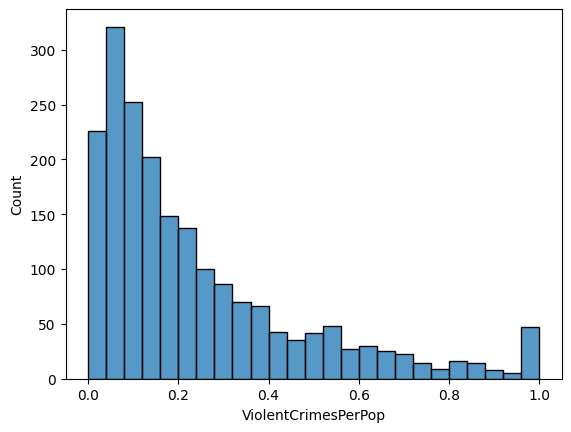

In [72]:
sns.histplot(data_df[target_column_name])

In [73]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
missing_percentage = data_df.isnull().mean()
missing_percentage

state                    0.000000
county                   0.588766
community                0.590271
communityname            0.000000
fold                     0.000000
population               0.000000
householdsize            0.000000
racepctblack             0.000000
racePctWhite             0.000000
racePctAsian             0.000000
racePctHisp              0.000000
agePct12t21              0.000000
agePct12t29              0.000000
agePct16t24              0.000000
agePct65up               0.000000
numbUrban                0.000000
pctUrban                 0.000000
medIncome                0.000000
pctWWage                 0.000000
pctWFarmSelf             0.000000
pctWInvInc               0.000000
pctWSocSec               0.000000
pctWPubAsst              0.000000
pctWRetire               0.000000
medFamInc                0.000000
perCapInc                0.000000
whitePerCap              0.000000
blackPerCap              0.000000
indianPerCap             0.000000
AsianPerCap   

It is safe to drop columns with more then 50% missing values since there is too little data left to train the model

In [74]:
threshold = 0.5
columns_to_drop = data_df.columns[data_df.isnull().mean() > threshold]
data_df = data_df.drop(columns=columns_to_drop)
print(f"Columns droped: {len(columns_to_drop)}")

Columns droped: 24


In [79]:
missing_percentage = data_df.isnull().mean()
missing_percentage[missing_percentage > 0]

OtherPerCap    0.000502
dtype: float64

In [81]:
data_df["OtherPerCap"].head(5)

0    0.36
1    0.22
2    0.28
3    0.36
4    0.51
Name: OtherPerCap, dtype: object

OtherPerCap: per capita income for people with 'other' heritage (numeric - decimal)

Since there is only 0.0502% of missing data we can use imputation to fill missing cells.

In [92]:
from sklearn.impute import SimpleImputer

column_names = data_df.columns
imputer = SimpleImputer()
data_df["OtherPerCap"] = pd.DataFrame(imputer.fit_transform(data_df["OtherPerCap"].to_frame()))

missing_percentage = data_df.isnull().mean()
missing_percentage[missing_percentage > 0]

Series([], dtype: float64)